In [1]:
import numpy as np
import matplotlib.pyplot as plt
import irf
from irf.ensemble import wrf_reg as rfr
from irf.utils import get_prevalent_interactions, visualize_impurity_decrease, visualize_prevalent_interactions, get_filtered_feature_paths

# Simulation for interaction selection

### simulation 1: Y = 1(X0 < 0.3, X1 < 0.5, X2 < 0.7)

In [2]:
#load_data generate simulation 1
n = 1000
p = 10
X = np.random.choice([0, 1], (n, p))
y_noiseless = (X[:, 0] < 0.3) * (X[:, 1] < 0.5) * (X[:, 2] < 0.7) 
noise = np.random.normal(0, 1, y_noiseless.shape)
SNR = 1
y = y_noiseless + (np.var(y_noiseless) / np.var(noise) * SNR**-1)**.5  * noise

In [3]:
#train_model train a random forest model
rf = rfr(bootstrap=True, n_estimators=300, max_features=5)
rf.fit(X,  y, keep_record=False)

wrf_reg(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=None,
        max_features=5, max_leaf_nodes=None, max_samples=None,
        min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1,
        min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=300,
        n_jobs=None, oob_score=False, random_state=None, verbose=0,
        warm_start=False)

- Observation: when max_features is set to be lower, the following results got worse.

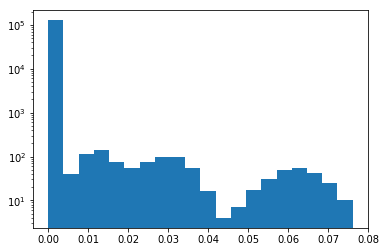

In [5]:
#visualize the impurity decrease of the rf model
visualize_impurity_decrease(rf, xscale='linear', bins=20)

In [61]:
#preprocess compute the prevalence
prevalence = get_prevalent_interactions(rf, impurity_decrease_threshold=0.005, min_support=10, signed=True)

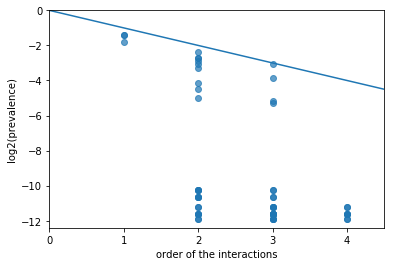

In [62]:
#visualize the interaction plot
visualize_prevalent_interactions(prevalence=prevalence)

In [148]:
#visualize find out the most prevalent interactions
sorted(prevalence.items(), key=lambda x:-x[1] * 2 **len(x[0]))[:20]

[(((0, '-'), (1, '-'), (2, '-'), (3, '-'), (4, '+')), 0.031250000000001),
 (((0, '-'), (1, '-'), (2, '-')), 0.1249999999999729),
 (((3, '-'), (4, '+')), 0.24999999999986078),
 (((0, '-'), (1, '-'), (2, '-'), (4, '+')), 0.05135416666666831),
 (((0, '-'), (1, '-'), (2, '-'), (4, '-')), 0.05135416666666782),
 (((4, '+'),), 0.41083333333305094),
 (((4, '-'),), 0.4108333333330502),
 (((0, '-'), (3, '-'), (4, '+')), 0.10156249999998322),
 (((0, '+'), (3, '-'), (4, '+')), 0.10156249999997902),
 (((0, '-'), (2, '-')), 0.18874999999991876),
 (((0, '-'), (1, '-'), (3, '-'), (4, '+')), 0.04614583333333481),
 (((0, '-'), (2, '-'), (3, '-'), (4, '+')), 0.045416666666667986),
 (((0, '-'), (1, '-'), (2, '-'), (3, '-')), 0.042395833333334694),
 (((0, '-'), (1, '-'), (2, '-'), (3, '+')), 0.0423958333333343),
 (((0, '-'), (2, '-'), (4, '-')), 0.08208333333332542),
 (((0, '-'), (1, '-'), (2, '-'), (3, '+'), (4, '+')), 0.020104166666666687),
 (((3, '+'), (4, '+')), 0.16083333333327723),
 (((0, '-'), (1, '

- Observation: the first is the right interaction.

### simulation 2: Y = 1(X0 < 0.3, X1 < 0.5, X2 < 0.7) + 1(X3 < 0.2, X4 > 0.3)

In [4]:
#load_data generate simulation 1
n = 1000
p = 10
X = np.random.choice([0, 1], (n, p))
y_noiseless = 10 * (X[:, 0] < 0.3) * (X[:, 1] < 0.5) * (X[:, 2] < 0.7) + 10 * (X[:, 3] < 0.2) * (X[:, 4] > 0.3) 
noise = np.random.normal(0, 1, y_noiseless.shape)
SNR = 10
y = y_noiseless + (np.var(y_noiseless) / np.var(noise) * SNR**-1)**.5  * noise

In [10]:
#train_model train a random forest model
rf = rfr(bootstrap=True, n_estimators=30, max_features=8)
rf.fit(X,  y, K=1, keep_record=False)

wrf_reg(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=None,
        max_features=8, max_leaf_nodes=None, max_samples=None,
        min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1,
        min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=30,
        n_jobs=None, oob_score=False, random_state=None, verbose=0,
        warm_start=False)

- Observation: when max_features is set to be lower, the following results got worse.

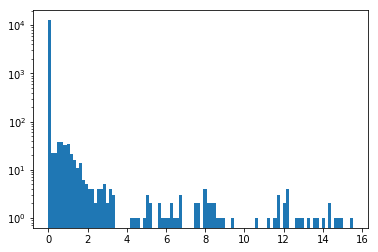

In [11]:
#visualize the impurity decrease of the rf model
visualize_impurity_decrease(rf, xscale='linear', bins=100)

In [12]:
#preprocess compute the prevalence
prevalence = get_prevalent_interactions(rf, impurity_decrease_threshold=0.01, min_support=10, signed=True)

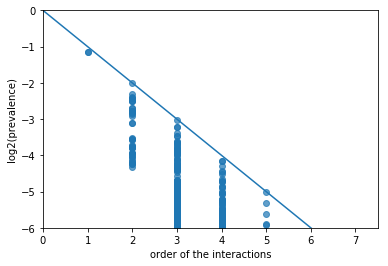

In [13]:
#visualize the interaction plot
visualize_prevalent_interactions(prevalence=prevalence, ylim=(-6, 0))

In [14]:
#visualize find out the most prevalent interactions
sorted(prevalence.items(), key=lambda x:-x[1] * 2 **len(x[0]))[:20]

[(((3, '-'), (4, '+')), 0.2499999999999927),
 (((0, '-'), (1, '-'), (2, '-')), 0.12382812499999966),
 (((0, '-'), (1, '-'), (2, '-'), (3, '-'), (4, '+')), 0.030859375000000015),
 (((3, '+'),), 0.45250651041667284),
 (((3, '-'),), 0.45250651041667106),
 (((0, '-'), (1, '-'), (2, '-'), (3, '+')), 0.0561523437500002),
 (((0, '-'), (1, '-'), (2, '-'), (3, '-')), 0.056022135416667125),
 (((2, '-'), (3, '-'), (4, '+')), 0.1083007812500001),
 (((2, '+'), (3, '-'), (4, '+')), 0.10830078124999944),
 (((0, '-'), (2, '-'), (3, '-'), (4, '+')), 0.05117187500000031),
 (((3, '-'), (4, '-')), 0.20250651041666276),
 (((0, '-'), (1, '-'), (2, '-'), (3, '-'), (4, '-')), 0.02516276041666666),
 (((0, '+'), (3, '+')), 0.19029947916666215),
 (((0, '-'), (1, '-'), (3, '+')), 0.09492187500000032),
 (((0, '-'), (1, '-')), 0.18772786458333),
 (((0, '-'), (3, '+')), 0.18583984374999665),
 (((0, '-'), (1, '-'), (2, '-'), (4, '-')), 0.04628906250000028),
 (((0, '-'), (1, '-'), (2, '-'), (4, '+')), 0.04563802083333

- Observation: the first is the right interaction.